In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read Csv

In [36]:
df_Og=pd.read_csv('Visadataset.csv')
df=df_Og.copy()

In [37]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [38]:
df.shape

(25480, 12)

In [39]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [40]:
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [41]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [42]:
  df_numerical_features = df.select_dtypes(exclude='object')
  df_categorical_features = df.select_dtypes(include='object')

## Object Columns

In [43]:
df_categorical_features

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,South,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,West,Year,Y,Certified


In [44]:
for i in df_categorical_features:  
    print(f"Column : {i}")
    print(df_categorical_features[i].unique())
    print("----------")
    print('\n')

Column : case_id
['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
----------


Column : continent
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
----------


Column : education_of_employee
['High School' "Master's" "Bachelor's" 'Doctorate']
----------


Column : has_job_experience
['N' 'Y']
----------


Column : requires_job_training
['N' 'Y']
----------


Column : region_of_employment
['West' 'Northeast' 'South' 'Midwest' 'Island']
----------


Column : unit_of_wage
['Hour' 'Year' 'Week' 'Month']
----------


Column : full_time_position
['Y' 'N']
----------


Column : case_status
['Denied' 'Certified']
----------




####  Case_id

In [69]:
df_categorical_features['case_id'].value_counts().value_counts()

1    25480
Name: case_id, dtype: int64

Every value is unique in case Id - No duplicatede values

### Continent 

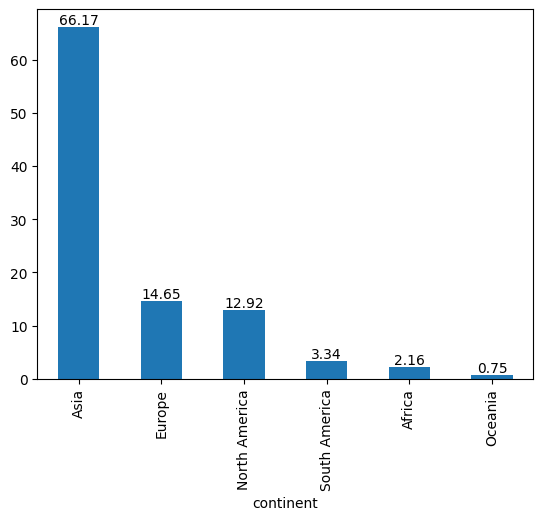

In [70]:
temp_df =round((df.groupby('continent').size().sort_values(ascending=False) / df.groupby('continent').size().sort_values(ascending=False).sum())*100,2)
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

### Region of employement

<Axes: >

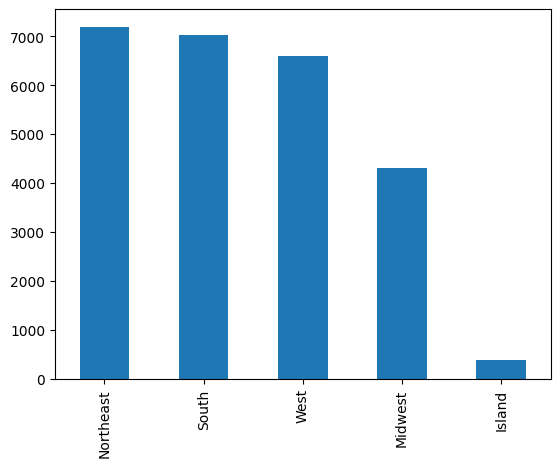

In [110]:
df_categorical_features['region_of_employment'].value_counts().plot(kind='bar')

region_of_employment,Island,Midwest,Northeast,South,West
continent,,,,,
Africa,1.451906,16.696915,38.475499,18.511797,24.863884
Asia,1.340371,19.992883,27.216654,28.497717,22.952375
Europe,0.857449,8.118971,25.857449,26.071811,39.094319
North America,2.490887,11.907655,33.839611,26.427704,25.334143
Oceania,2.083333,19.791667,25.520833,22.916667,29.687500
South America,2.699531,13.028169,31.220657,26.173709,26.877934


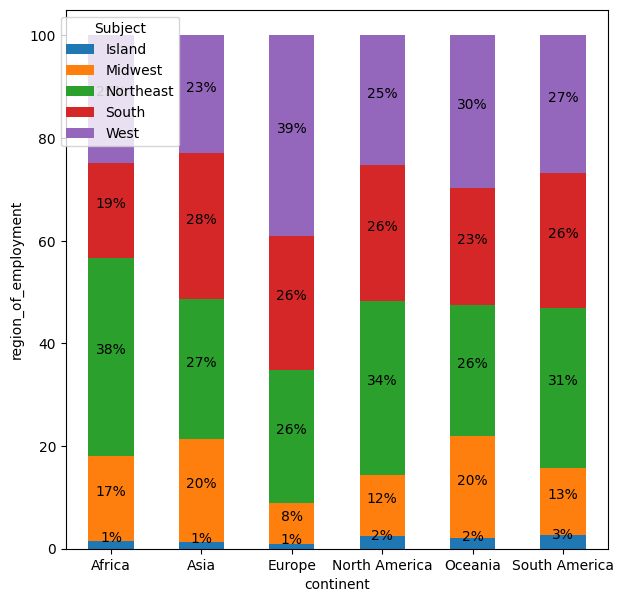

### Region and Continent 

region_of_employment,Island,Midwest,Northeast,South,West
continent,,,,,
Africa,1.451906,16.696915,38.475499,18.511797,24.863884
Asia,1.340371,19.992883,27.216654,28.497717,22.952375
Europe,0.857449,8.118971,25.857449,26.071811,39.094319
North America,2.490887,11.907655,33.839611,26.427704,25.334143
Oceania,2.083333,19.791667,25.520833,22.916667,29.687500
South America,2.699531,13.028169,31.220657,26.173709,26.877934


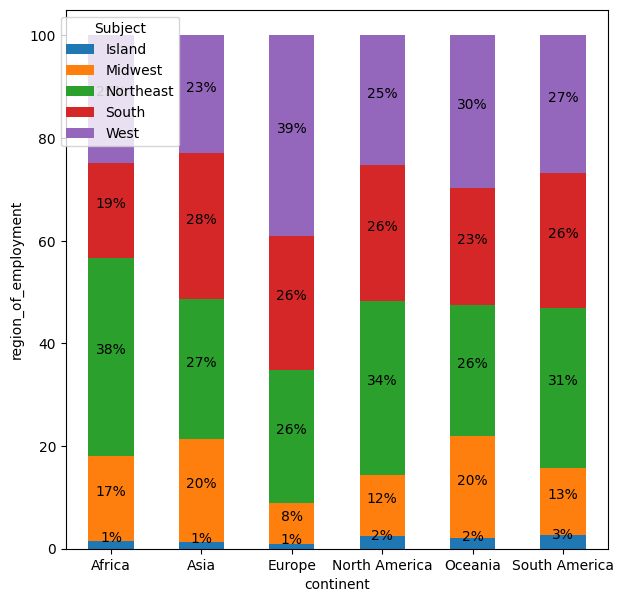

In [112]:



ax= pd.crosstab(df['continent'], df['region_of_employment']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(7,7),stacked=True, rot=0)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('continent')
plt.ylabel('region_of_employment')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

In [93]:
cross=pd.crosstab(df.continent, df.region_of_employment).apply(lambda r: (r/r.sum())*100, axis=1)
cross

region_of_employment,Island,Midwest,Northeast,South,West
continent,,,,,
Africa,1.451906,16.696915,38.475499,18.511797,24.863884
Asia,1.340371,19.992883,27.216654,28.497717,22.952375
Europe,0.857449,8.118971,25.857449,26.071811,39.094319
North America,2.490887,11.907655,33.839611,26.427704,25.334143
Oceania,2.083333,19.791667,25.520833,22.916667,29.687500
South America,2.699531,13.028169,31.220657,26.173709,26.877934


### Education


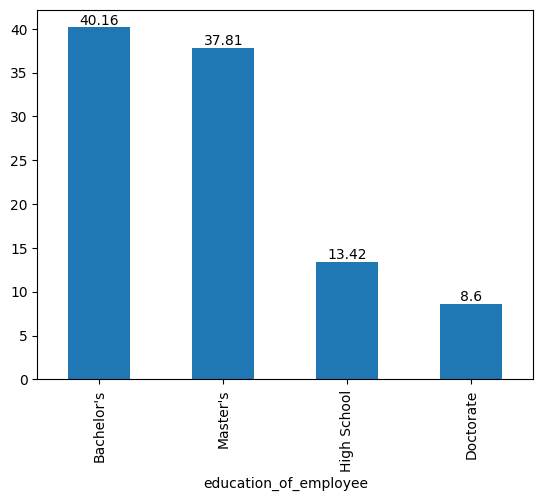

In [71]:
temp_df =round((df.groupby('education_of_employee').size().sort_values(ascending=False) / df.groupby('education_of_employee').size().sort_values(ascending=False).sum())*100,2)
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

### Experience

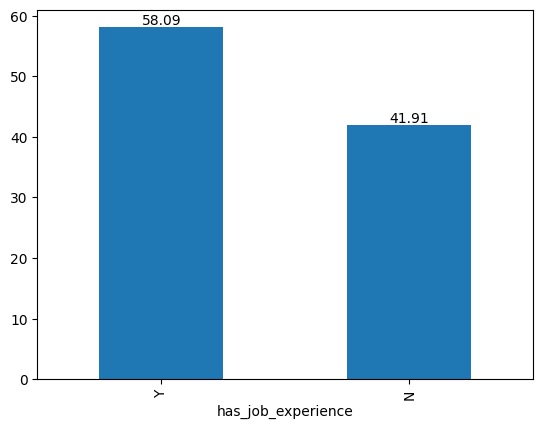

In [72]:
temp_df =round((df.groupby('has_job_experience').size().sort_values(ascending=False) / df.groupby('has_job_experience').size().sort_values(ascending=False).sum())*100,2)
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

### Job training  

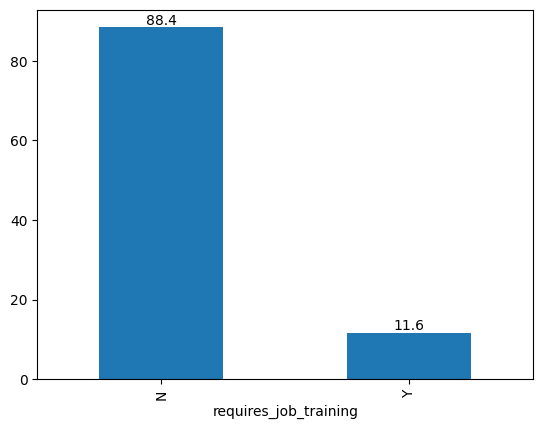

In [94]:
temp_df =round((df.groupby('requires_job_training').size().sort_values(ascending=False) / df.groupby('requires_job_training').size().sort_values(ascending=False).sum())*100,2)
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

### Positioning

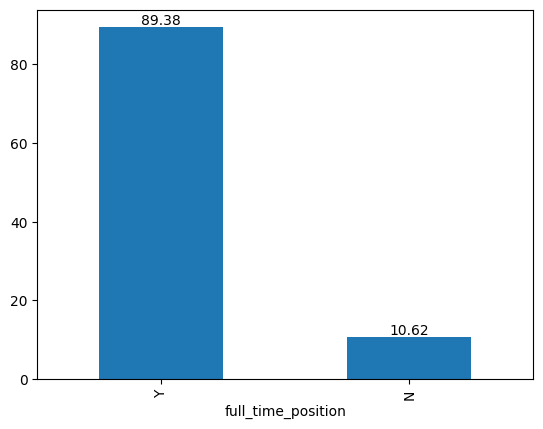

In [113]:
temp_df =round((df.groupby('full_time_position').size().sort_values(ascending=False) / df.groupby('full_time_position').size().sort_values(ascending=False).sum())*100,2)
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()


### Experience and job training

requires_job_training,N,Y
has_job_experience,,
N,84.173066,15.826934
Y,91.453858,8.546142


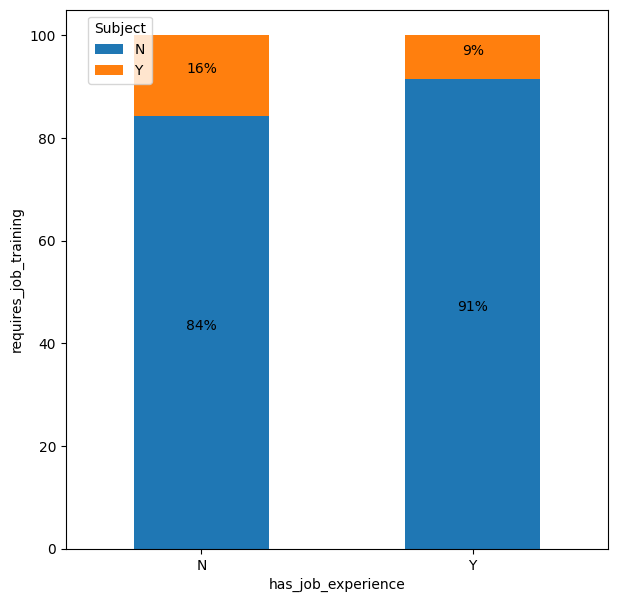

In [107]:
ax= pd.crosstab(df['has_job_experience'], df['requires_job_training']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(7,7),stacked=True, rot=0)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('has_job_experience')
plt.ylabel('requires_job_training')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

### Education and Experince


has_job_experience,N,Y
education_of_employee,,
Bachelor's,42.485832,57.514168
Doctorate,42.928832,57.071168
High School,40.818713,59.181287
Master's,41.446959,58.553041


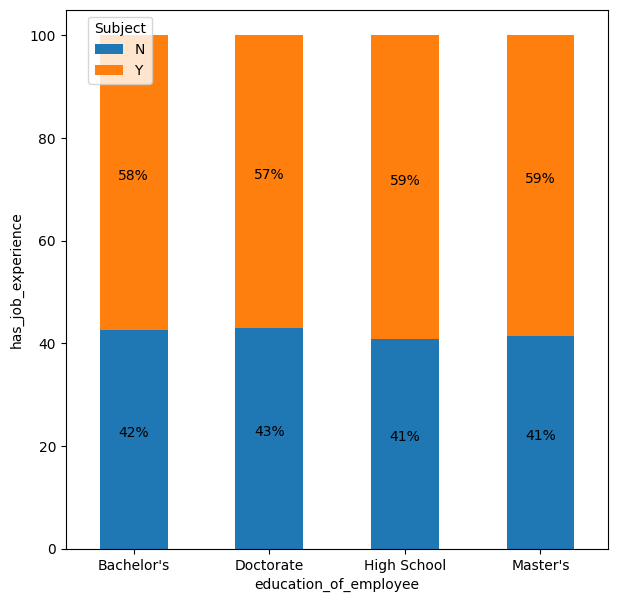

In [108]:



ax= pd.crosstab(df['education_of_employee'], df['has_job_experience']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(7,7),stacked=True, rot=0)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('education_of_employee')
plt.ylabel('has_job_experience')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

### Position and education

full_time_position,N,Y
education_of_employee,,
Bachelor's,6.673832,93.326168
Doctorate,3.649635,96.350365
High School,6.023392,93.976608
Master's,18.040274,81.959726


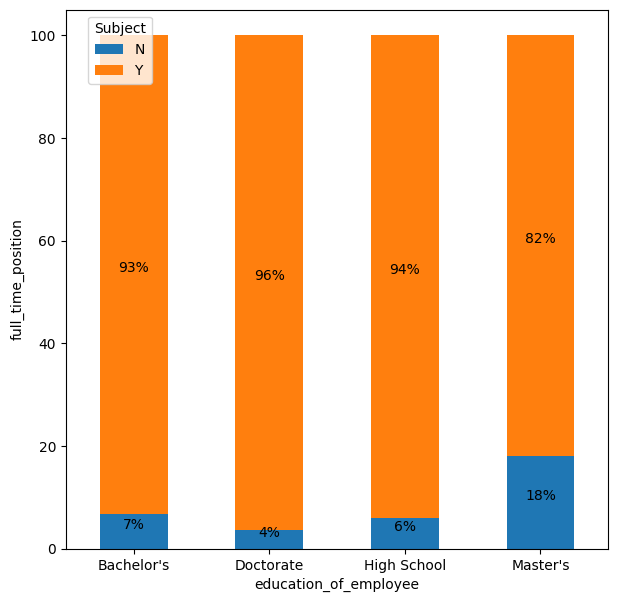

In [118]:




ax= pd.crosstab(df['education_of_employee'], df['full_time_position']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(7,7),stacked=True, rot=0)
display(ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('education_of_employee')
plt.ylabel('full_time_position')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

### position and case_status

## Numerical Columns

In [119]:
df_numerical_features

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700
